# [Uninsured Idiosyncratic Risk and Aggregate Saving](https://www.jstor.org/stable/2118417?seq=1#metadata_info_tab_contents)
* Author: S. Rao Aiyagari
* Source: The Quaterly Journal of Economics, Vol. 109, No. 3 (Aug., 1994), pp. 659-684
* Notebook by Zixuan Huang and Mingzuo Sun
* 2019 Fall

This notebook uses [EconForge/Dolark](http://www.econforge.org/dolark/) toolkit to describe the results and reproduce the tables in the linked paper.

__NOTES:__ This is a preliminary draft. This replication depends on $\texttt{Dolo}$ 's and $\texttt{Dolark}$ 's current master branch.

In [1]:
# Set up
# Before this setup, please go and check "README.md" to install what are necessary for running the following code.
from dolo import *

import dolark
from dolark import HModel  # The model is written in yaml file, and HModel reads the yaml file.
from dolark.equilibrium import find_steady_state
from dolark.perturbation import perturb   #find variations
from dolo import time_iteration, improved_time_iteration     #time iteration is backward induction
from matplotlib import pyplot as plt
import numpy as np

## Abtract 
* The paper modifies standard growth model to include precautionary saving motives and liquidity constraints. 
* The paper examines the impact of the introduction of a particular kind of uninsurable idiosyncratic risk on the aggregate saving rate; the importance of asset trading to individuals; and the relative inequality of the wealth and income distributions. 

## Introduction

### Paper's Goals 
* To provide an exposition of models whose aggregate behavior is the result of market interaction among a large number of agents subject to idiosyncratic shocks. 
> * This class of models contrasts with representative agent models where individual dynamics and uncertainty coincide with aggregate dynamics and uncertainty. <br/>
> * This exposition is built around the standard growth model of Brock and Mirman(1972) modified to include a role for uninsured idiosyncratic risk and borrowing constraint.
* To use such a model to study the quantitative importance of individual risk for aggregate saving. <br/>


### Key features
* Endogenous heterogeneity 
* Aggregation
* Infinite horizons 
* Exogenous borrowing constraint
* General equilibrium. i.e. interest rate is endogenously determined since in a steady state equilibrium the capital per capita must equal the per capita asset holdings of consumers, and the interest rate must equal the net marginal product of capital. 

## Related Literature
* The Aiyagari model originates from Bewley model and a subsequent literature Zeldes (1989), Deaton (1991), Carroll (1992), and puts these kinds of models into a general equilibrium context. These models all share the same key components as mentioned in the previous part. And they are used to study the following topics:
> * How much of observed wealth inequality does a particular choice of uninsurable idiosyncratic income uncertainty explain? <br/>
> * In this model, what is the fraction of aggregate savings due to the precautionary motive? <br/>
> * In this model, what are the redistributional implications of various policies?


## Model
### The Individual's Problem

\begin{split}
&\max E_0\left(\sum_{t=0}^\infty \beta^t U(c_t)\right)\\
&\text{s.t.}\\
&c_t+a_{t+1}=wl_{t}+(1+r)a_t \\
&c_t\geq0\\
&a_t\geq-\phi
\end{split}


where $\phi$ (if positive) is the limit on borrowing; $l_t$ is assumed to be i.i.d with bounded support given by $[l_{min},l_{max}]$, with $l_{min}>0$; $w$ and $r$ represent wage and interest rate repectively.


* $\hat{a}_t\equiv a_t+\phi$ 
* $z_t \equiv wl_t+(1+r)\hat{a}_t-r\phi$: total resources of the agent at date $t$ respectively. 
* Then the Bellman equation is as follows:
$$
\begin{split}
V(z_t,\phi,w,r) \equiv \underset{\hat{a}_{t+1}}{\max}\left(U(z_t-\hat{a}_{t+1})+\beta \int V(z_{t+1},\phi,w,r)\ dF(l_{t+1})  \right)
\end{split}
$$

* Euler equation: 

\begin{split}
U^\prime (z_t-\hat{a}_{t+1})=\beta(1+r)\int U^\prime (z_{t+1}-\hat{a}_{t+2})\ dF(l_{t+1})
\end{split}

* Decision rule: $\hat{a}_{t+1}=A(z_t,\phi,w,r)$ 
* Law of transition: $z_{t+1}=wl_{t+1}+(1+r)A(z_t,\phi,w,r)-r\phi$

### Firm's problem
\begin{split}
\max F(K,L)-wL-rK
\end{split}



where $K$ is the aggregate capital, $L$ is the aggregate labor, $F(K,L)$ is the production function.

### General Equilibrium
In the steady state, variables are time invariant and all markets are clear, i.e.,
* $F_K(K,L) = r+\delta $
* $F_L(K,L) = w$
* $\int l_i di = L$
* $\int a_i di = K$

In [2]:
# model is written in .yaml file
# HModel reads the yaml file
aggmodel = HModel('Aiyagari.yaml')

# check features of the model   
aggmodel.features

{'ex-ante-identical': True,
 'conditional-processes': False,
 'iid-shocks': False}

## Model Specification, Parameterization, and Consumption

### Model specification and parameters
| Parameter      | Description               | Value           ||
|:------:| ------       | ------    | :------:  |
|$\beta$ | Time Preference Factor | 0.96 | 
| $\delta$ | Depreciation Rate | 0.08 |
| $\alpha$ | Capital Share | 0.36 |
| $\phi$ |     Borrowing Limit | 0 |
| $\mu$ | Risk Aversion Coefficient | {1,3,5} |
| $\rho$ | Serial Correlation of Labor Shocks | {0,0.3,0.6,0.9} |
| $\sigma$ | Variance of Labor Shocks | {0.2,0.4} |



* Production function: Cobb Douglas with the capital share taken to be $\alpha$
\begin{split}
F(K,L) = K^\alpha L^{1-\alpha}
\end{split}
* Utility function: CRRA with the relative risk aversion coefficient $\mu$
* Labor endowment shocks: 
$$
\begin{split}
\log(l_t)=\rho\log(l_{t-1})+\sigma(1-\rho^2)^{\frac{1}{2}}\epsilon_{t}, \ \epsilon_t \sim N(0,1)   
\end{split}
$$


### Computation
After importing the model written in .yaml, we can calculate the equilibrium by using $\texttt{Dolark}$

In [3]:
# baseline case where coefficient risk aversion is 1, serial correlation is 0.9 and variance of labor shocks is 0.04
# other values of variables are the same as the those in parameter tables
eq = find_steady_state(aggmodel)

Computing Initial Initial Rule... done
Computing Steady State...done


## Key Results

In [4]:
# data frame of the steay state
df = eq.as_df()

In [5]:
# plot relationship between assets of this period and of next period  
# altair plots a graph showing even if people have the same of level of wealth, their decisions are still different due to the idiosyncratic labor income shocks
import altair as alt
import pandas as pd

df = eq.as_df()
alt.Chart(df).mark_line().encode(
    x = alt.X('a', axis = alt.Axis(title='Current Assets')),
    y = alt.Y('i', axis=alt.Axis(title='Next Period Assets'))
)

alt.Chart(...)

### Aggregate Saving

We first calculate the aggregate saving rate under baseline parameters, where $\rho =0.9$,$\mu = 1$, and $\sigma = 0.2$

In [6]:
# extract variables from the steady state solution
a = df['a']
r = df['r']
w = df['w']
e = df['e']
i = df['i']
μ = df['μ']

In [7]:
# calculate consumption
c = [(1+r[j])*a[j] + w[j]*np.exp(e[j]) - i[j] for j in range(len(df))]

# calcualte income 
income = [(r[j]+0.08)*a[j] + w[j]*np.exp(e[j]) for j in range(len(df))]   #depreciation is 8%

In [8]:
# aggregate consumption and income
agg_c = np.inner(c,μ)
agg_inc = np.inner(income,μ)

In [9]:
# aggregate consumption and income as an output
print(agg_c)
print(agg_inc)

1.5725440821894816
2.0794337125030724


In [10]:
# saving rate 
# risk aversion: 1; serial correlation: 0.9, varinace of labor shock: 0.04
saving = 1 - agg_c/agg_inc
saving   

0.24376330308862482

So you can see the aggregate saving rate is 24.38% under the baseline parameters. Comparabaly, Aiyagari(1994) calcuates this number as 24.14%.

Now, we calculate all other combinations of parameters as Aiyagari(1994) does, and compare them both.

In [11]:
# Be patient. This could calculate for a while. The long wait will be forgotten once the meal is cooked.

rows = []                             # create a place to save results
rho_values = np.linspace(0, 0.9, 4)   #change serial correlation coefficent "rho "in {0, 0.3, 0.6, 0.9}
sig_values = np.linspace(0.2, 0.4, 2) #change the variance of labor shocks "sig" in {0.2, 0.4}
epsilon_values = np.linspace(1, 5, 3)       #change the coefficient of risk aversion {1,3,5}

# recall that in the yaml file, there are individual and the aggregate part of the model
# .model.set_calibration enables you to change calibration parameters in the individual part of the yaml model
# .set_calibration enables you to change the calibration parameters in the aggregate part of the model
# following Aiyagari, we only change parameters in the individual part. But you can definitely play with different calibrations in the aggregate part
for l in epsilon_values:
    aggmodel.model.set_calibration( epsilon = l)         
    for n in sig_values:
        aggmodel.model.set_calibration( sig = n )
        for m in rho_values:
            aggmodel.model.set_calibration( rho=m )
            eq = find_steady_state(aggmodel)
            df = eq.as_df()
            a = df['a']
            r = df['r']
            w = df['w']
            e = df['e']
            μ = df['μ']
            i = df['i']
    
            # calculate consumption
            c = [(1+r[j])*a[j] + w[j]*np.exp(e[j]) - i[j] for j in range(len(df))]

            # calcualte income 
            income = [(r[j]+0.08)*a[j] + w[j]*np.exp(e[j]) for j in range(len(df))]  # depreciation is 8%
            
            # aggregate consumption and cinome
            agg_c = np.inner(c,μ)
            agg_inc = np.inner(income,μ)
            
            saving = (1 - agg_c/agg_inc)*100   #convert to %
            saving_rate = float("%.2f" % saving)  #with 2 decimals
            
            rows.append((l, n, m, saving_rate))     # append the results in each round to the previous results

Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... 

In [14]:
# Now we want to create data frames for both results I calcuated and the results caculated by Aiyagari(1994)

# Import modules
import pandas as pd

# Data frame of the results we calculated
df1 = pd.DataFrame(rows)
df1.columns = ['Risk Averse Coefficient', 'Variance of Labor Shocks', 'Serial Correlation', 'Saving Rate'] # add names for columns

# Now we want to create a data frame for results in Aiyagari(1994)
# First, import the excel file containing Aiyagari(1994)'s results and call it xls_file
xls_file = pd.ExcelFile('Data/Aiyagari_SavingRate.xlsx')
# Load the xls file's Sheet1 as a dataframe
df2 = xls_file.parse('Sheet1')

# Merge the two data frame, and let the two share the same first three columns
df3 = pd.merge(df1,df2, on=['Risk Averse Coefficient','Variance of Labor Shocks', 'Serial Correlation'])

# Then we are able to see the results
df3.head()

,Risk Averse Coefficient,Variance of Labor Shocks,Serial Correlation,Saving Rate,Saving Rate_Aiyagari
0,1.0,0.2,0.0,24.28,23.67
1,1.0,0.2,0.3,24.28,23.73
2,1.0,0.2,0.6,24.33,23.82
3,1.0,0.2,0.9,24.38,24.14
4,1.0,0.4,0.0,24.40,23.87


In [15]:
# Tabulate the data frame, convert it to a markdown table, and write it in "Table_SavingRate.md"
# "Table_SavingRate.md" is loated in the same directory as this notebook.
from tabulate import tabulate

headers = ["Risk Averse Coefficient", "Variance of Labor Shocks", "Serial Correlation", "Saving Rate","Saving Rate_Aiyagari"]

# save it in a markdown table
md = tabulate(df3,headers, tablefmt="github")
#save the markdown table
# with open("Table_SavingRate.md", "w") as table:
#     table.write(md)           

# save it in a latex table
latex = tabulate(df3,headers, tablefmt="latex")
path = 'Tex/Tables/Table_SavingRate.tex'
#save the latex table
with open(path, 'w') as f:
    f.write(latex)  

You can also click [here](Archive/Table_SavingRate.md) for a markdown table.

### Inequality Measures

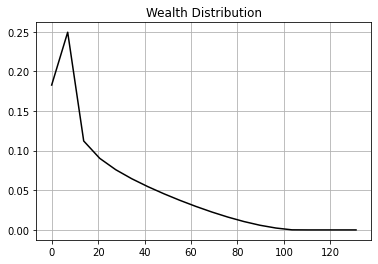

In [18]:
# plot wealth distribution under the baseline calibration
s = eq.dr.endo_grid.nodes # grid for states (i.e the state variable--wealth in this case)
plt.plot(s[0:20], eq.μ.sum(axis=0)[0:20], color='black')   # I drop the last 10 grids when plotting since the probabilities of these levels of wealth are very close to zero. # The reason why I didn't use log for wealth is that taking log of a number which is extremely close to zero gets a very negative number 
plt.grid()
plt.title("Wealth Distribution")
# plt.savefig('Figure_WealthDistribution.png')    # save the figure in the current directory 

# save the figure in the directory where TeX file is located.
save_results_to = 'Tex/Figures/'
plt.savefig(save_results_to + 'Figure_WealthDistribution.png', dpi = 300)

## Conclusions and Comments
* Our results are highly similar to but a bit different fom those in Aiyagari(1994). This is because we use a different discrete-valued Markov Chain(MC) to approximate the AR process of individuals' idiosyncratic income shock. In our replication, three grid points (i.e. three MC states), which is by default in $\texttt{Dolo}$ and $\texttt{Dolark}$, are used to simulate the AR process, whereas the number is seven in Aiyagari(1994).
* The Aiyagari model extends the Bewley model to a context with a production sector. Deviating from the representative agent model in which complete market is implicitly assumed, it tries to study the aggregate saving behavior of the economy with the agents facing a particular kind of uninsured idiosyncratic risk. With an empirically plausible set of parameters, it finds that the aggregate saving rate does increase compared to the case with a complete market, however, the change here caused by the precautionary saving motive is mild. Also, the results of the model qualitatively match the real data in terms of the ranking of the fluctuations of some economic variables. However, in terms of approaching the real inequalities of income and wealth shown by the data, the model does not perform very well. Also, in this model, the joint distribution of income and wealth is not treated as a state variable, which neglects the distribution effect Krusell and Smith(1998) try to address.